<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Aqueous Geochemical Speciation</h1><h2>WORM Workshop March 2025</h2></td>
</tr>
</table>
</left>

### A story about a geochemist

One day a geochemist took a field trip to the Salt Verde River System in central Arizona.

It was a beautiful day to explore this tributary of the Colorado river and admire the surrounding scenery.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Verde_River_near_Clarkdale%2C_Arizona.jpg" alt="Verde River" title="Verde River" width=100%/>

The geochemist is interested in the quality of the water. The river system is an important source of water for numerous Arizona communities, including the Salt River Pima-Maricopa Indian Community located at the confluence of the Salt and Verde rivers. Further, this river system is home to many native plants and animals, and is a critical flyway for migratory birds. With so many depending on this water, it makes sense to try to understand its composition.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Gilarivermap.png" alt="Field spectrophotometry" title="'How much silica is in this water?'" width=300/>

The geochemist tucked her sampling permit into her pocket and stepped up to the edge of the Salt River.

"Let's start with something simple," the geochemist pondered. "How much silica is dissolved in this water?" .

She collected a sample in a glass vial and measured the concentration of total silica with a field spectrophotometer.

<img src="https://www.sierraclub.org/sites/default/files/sce/grand-canyon-chapter/images/Data-page_Verde.jpg" alt="Field spectrophotometry" title="'How much silica is in this water?'" width=300/>

The spectrophotometer read: **15 parts per million (ppm)**, or **0.25 millimolal**.

"That answers that!" the geochemist said, preparing to go home.

But then she recalled that SiO$_{2(aq)}$ can change forms depending on pH:

$$\color{orangered}{\text{SiO}_{2(aq)} + \text{H}_{2}\text{O} \rightleftharpoons \text{HSiO}_{3}^{-} + \text{H}^{+}}$$

The geochemist knew that the spectrophotometer only measured total dissolved silica and did not report how much was actually HSiO$_{3}^{-}$.

"How much of the dissolved silica is the hydrogen silicate ion?" the geochemist asked.

She unpacked a pH meter and measured the pH and temperature of the water.

<img src="https://www.horiba.com/fileadmin/_processed_/csm_Inukami_river__03_8fcde5397f.jpg" alt="Field spectrophotometry" title="'What is the pH and temperature of this water?'" width=200/>

The meter read: **pH 8.3** and **25.0 °C**

The geochemist logged into the WORM Portal using her field laptop and calculated the logK of the reaction to form the hydrogen silicate ion at 25.0 °C.

In [1]:
# import the function we need (subcrt)
from pychnosz import subcrt

# calculate the logK of SiO2 + H2O = HSiO3- + H+ at 25.0 °C
subcrt(["SiO2", "H2O", "HSiO3-", "H+"],
       [-1, -1, 1, 1],
       property="logK", T=25.0,
       show=False, messages=False).out

reset: thermodynamic system initialized


,T,P,logK
0,25.0,1.0001,-9.585296


$$\color{orangered}{\text{logK} = -9.59}$$

The geochemist knew that she could use this $\text{logK}$ and her field measurements to calculate the activity ("effective concentration") of HSiO$_{3}^{-}$.

$$\color{orangered}{\text{logK} = \log[\text{HSiO}_{3}^{-}] + \log[\text{H}^{+}] - \log[\text{SiO}_{2(aq)}] - \log[\text{H}_{2}\text{O}]}$$

The log activity of protons is equal to $-\text{pH}$. Further, the log activity of H$_2$O is very close to zero under surface conditions. This simplifies the equation:

$$\color{orangered}{\text{logK} = \log[\text{HSiO}_{3}^{-}] - \text{pH} - \log[\text{SiO}_{2(aq)}]}$$

The geochemist plugged in the $\text{logK}$ she calculated and the pH and concentration of SiO$_{2(aq)}$ she measured. She solved for HSiO$_{3}^{-}$:

\begin{align}
\color{orangered}{-9.59} &\color{orangered}{= \log[\text{HSiO}_{3}^{-}] - 8.3 - \log[0.25 \times 10^{-3} \text{molal}]} \\
\color{orangered}{\log[\text{HSiO}_{3}^{-}]} &\color{orangered}{= -9.59 + 8.3 + \log[0.25 \times 10^{-3} \text{molal}]} \\
\color{orangered}{\text{HSiO}_{3}^{-}} &\color{orangered}{= 1.3 \times 10^{-5} \text{molal}}
\end{align}

In [2]:
# solve it here, just to be sure!
import math
10**(-9.59 + 8.3 + math.log10(0.00025))

1.2821534599784144e-05

"The concentration of the hydrogen silicate ion is about two orders of magnitude less than that of dissolved silica," the geochemist said. "That answers that!"

Satisfied with her answer, she finished sampling the Salt River, then moved on to the Verde River that afternoon to collect samples there, too.

Driving back to the lab, the geochemist had a sudden realization.

"What if the hydrogen silicate ion is complexing with other ions, like Mg$^{2+}$, Ca$^{2+}$, and Na$^{+}$? What are the concentrations of *those* complexes?"

She unpacked her water sample at the lab and analyzed the total concentrations of major dissolved cations and anions with an ion chromatograph.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Metrohm_850.jpg/1280px-Metrohm_850.jpg" alt="Ion Chromatograph" title="'What are the concentrations of total dissolved cations in this water?'" width=300/>

While analyzing the anions, the geochemist had another disturbing realization.

"I'm measuring **total** concentrations of major dissolved cations in the water. Mg$^{2+}$, Ca$^{2+}$, and Na$^{+}$ might also be complexed with anions besides HSiO$_{3}^{-}$, like HCO$_{3}^{-}$ and CO$_3^{2-}$!"

The geochemist sat down and wrote out the chemical reactions for the formation of these complexes.

She realized she could designate aqueous species as *basis* or *non-basis* to make the setting up the problem easier. All reactions can be set up to form a single non-basis species from a small selection of simple basis species:

$\color{magenta}{\text{Basis} : \text{SiO}_{2}, \text{H}_{2}\text{O}, \text{H}^{+}, \text{Mg}^{2+}, \text{Ca}^{2+}, \text{Na}^{+}, \text{HCO}_{3}^{-}}$

$\color{lime}{\text{Non-Basis} : \text{HSiO}_{3}^{-}, \text{Mg(HSiO}_{3}\text{)}^{+}, \text{Ca(HSiO}_{3}\text{)}^{+}, \text{NaHSiO}_{3(aq)}, \text{Mg(HCO}_{3}\text{)}^{+}, \text{Ca(HCO}_{3}\text{)}^{+}, \text{NaHCO}_{3}, \text{CO}_{3}^{2-}, \text{MgCO}_{3(aq)}, \text{CaCO}_{3(aq)}, \text{NaCO}_{3}^{-}}$


\begin{align}
\color{magenta}{\text{SiO}_{2}} + \color{magenta}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{lime}{\text{HSiO}_{3}^{-}} + \color{magenta}{\text{H}^{+}} \\
\color{magenta}{\text{SiO}_{2}} + \color{magenta}{\text{Mg}^{2+}} + \color{magenta}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{lime}{\text{Mg(HSiO}_{3}\text{)}^{+}} + \color{magenta}{\text{H}^{+}} \\
\color{magenta}{\text{SiO}_{2}} + \color{magenta}{\text{Ca}^{2+}} + \color{magenta}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{lime}{\text{Ca(HSiO}_{3}\text{)}^{+}} + \color{magenta}{\text{H}^{+}} \\
\color{magenta}{\text{SiO}_{2}} + \color{magenta}{\text{Na}^{+}} + \color{magenta}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{lime}{\text{NaHSiO}_{3(aq)}} \\
\end{align}

\begin{align}
\color{magenta}{\text{HCO}_{3}^{-}} &\rightleftharpoons \color{lime}{\text{CO}_{3}^{2-}} + \color{magenta}{\text{H}^{+}} \\
\color{magenta}{\text{HCO}_{3}^{-}} + \color{magenta}{\text{Mg}^{2+}} + &\rightleftharpoons \color{lime}{\text{Mg(HCO}_{3}\text{)}^{+}} + \color{magenta}{\text{H}^{+}} \\
\text{...} & \text{and so on...}
\end{align}

To get the concentrations of the complexes, the geochemist figured she would calculate the logK of each reaction then solve the system of nonlinear equations.

As she assembled the analytical data into spreadsheets on her computer, the geochemist considered the process required to calculate the concentrations of all these solutes.

She would have to find the root solution to an enormous set of nonlinear equations. It would take a *lot* of time and effort to do by hand, even for a single sample.

"I've got it!" the geochemist exclaimed.

She logged into her WORM Portal account and grabbed a copy of the Aqueous Speciation notebook from the WORM Library. Using her spreadsheets of analytical data as input for the calculations, the geochemist quickly performed a speciation calculation in the notebook:

In [3]:
import aqequil
ae = aqequil.AqEquil(db="wrm")
speciation = ae.speciate(input_filename="Salt_Verde_River.csv",
                         verbose=0)

Loading a user-supplied thermodynamic database...
data1.wrm is now set as the active thermodynamic database.
This database is meant for rapid calculations between 0 and 350 °C at water saturation pressure.


*(Open 'Salt_Verde_River.csv' in the file browser to see the water chemistry data the geochemist used in her speciation calculation.)*

The geochemist could look up calculated log activities of the aqueous species in her samples. Silica complexes, for instance:

In [4]:
speciation.lookup(["SiO2", "HSiO3-", "MgHSiO3+", "CaHSiO3+", "NaHSiO3"])

Sample,SiO2,HSiO3-,MgHSiO3+,CaHSiO3+,NaHSiO3
,log_activity,log_activity,log_activity,log_activity,log_activity
Sample,,,,,
Salt River,-3.6531,-4.9184,-6.9316,-6.9557,-4.8593
Verde River,-3.5360,-5.1010,-6.9095,-7.1401,-6.3223


The geochemist could even visualize basis species as a percent of the total aqueous species. She started with silica, "SiO2".

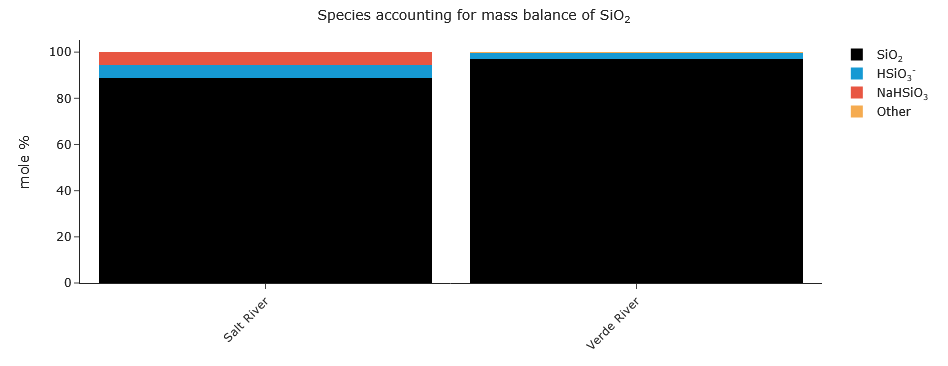

In [5]:
speciation.plot_mass_contribution("SiO2")

She could also visualize magnesium, calcium, and their complexes:

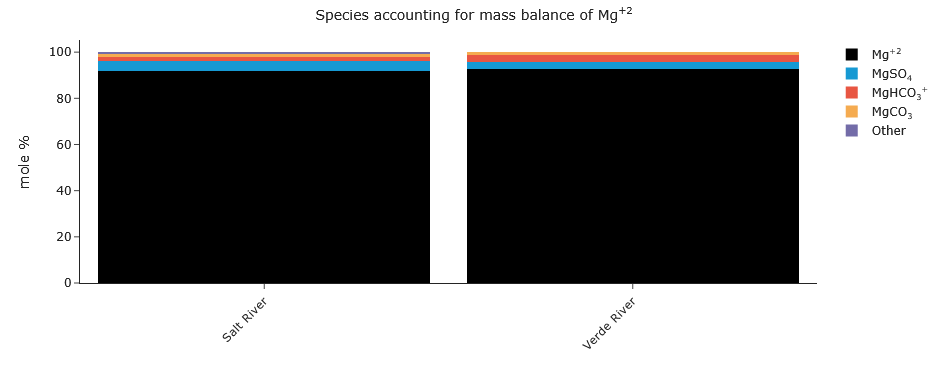

In [6]:
speciation.plot_mass_contribution("Mg+2")

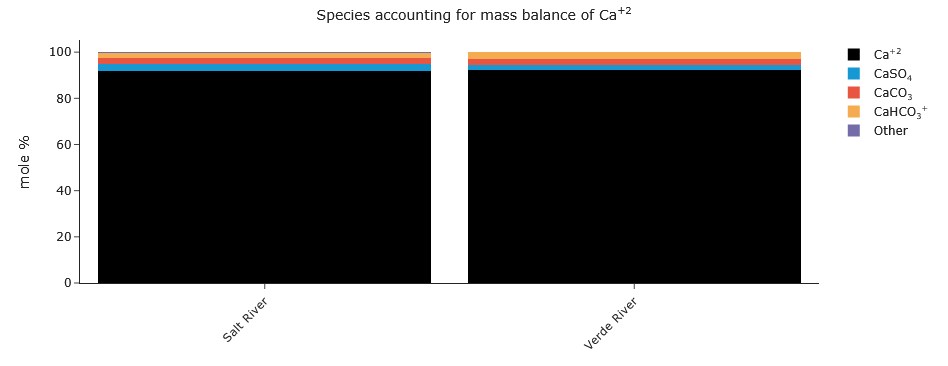

In [7]:
speciation.plot_mass_contribution("Ca+2")

And bicarbonate:

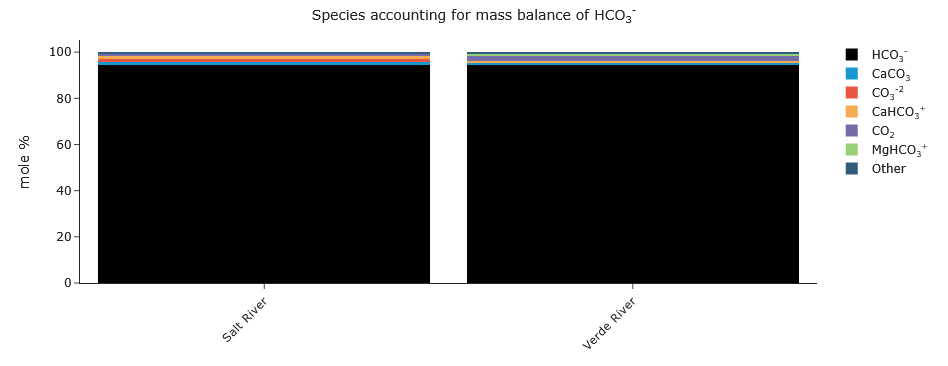

In [8]:
speciation.plot_mass_contribution("HCO3-")

She could compare the compositions of the two samples with a barplot...

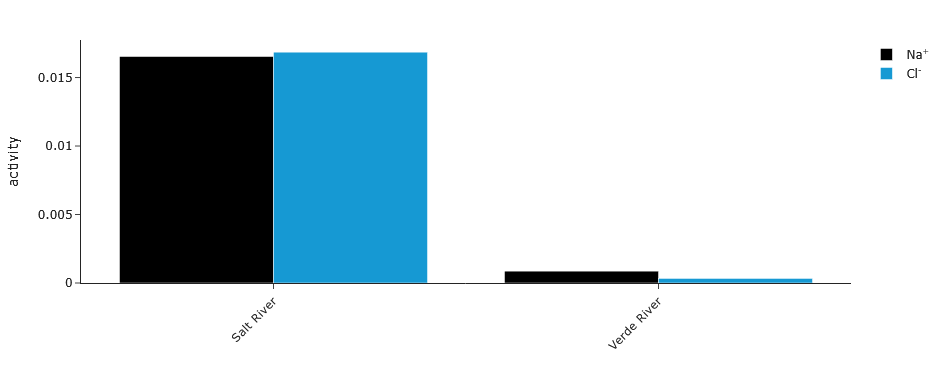

In [9]:
speciation.barplot(['Na+', 'Cl-'])

...and plot mineral saturation indices (distance from equilibrium, in kcal/mol). She could see which pure minerals were supersaturated (blue, thermodynamic drive to precipitate) and undersaturated (orange, thermodynamic drive to dissolve) in a sample:

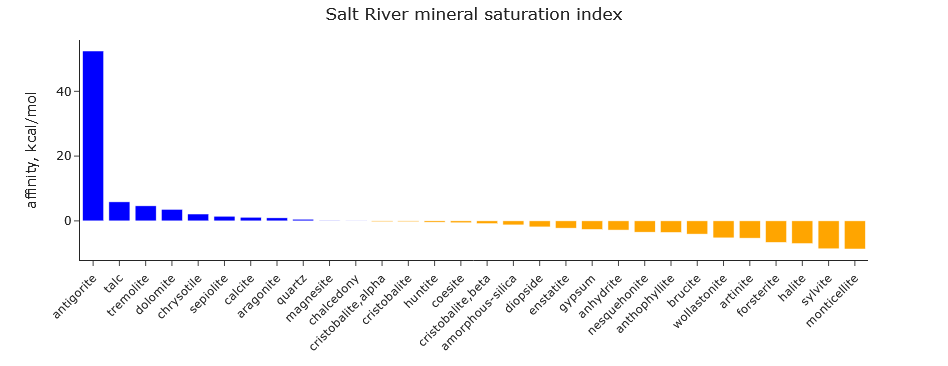

In [10]:
speciation.plot_mineral_saturation('Salt River', plot_width=6)

"That answers that!" The geochemist stood up to go home and eat a nice meal to celebrate a job well done. But something stopped her. It was another burning question.

"What about the other dozen samples I collected today?"

### Workshop Outline

- <s>Story time! Aqueous geochemical speciation with WORM</s>
- Hands-on exploration in a breakout session